# Алгоритмы кластеризации

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import cluster

In [134]:
header = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length_g', 'type']

In [135]:
df = pd.read_csv('seeds_dataset.txt', delimiter='\t+', names=header, engine='python')

In [11]:
df.head(10)

,area,perimeter,compactness,length,width,asymmetry,length_g,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [149]:
#Удаляем столбец с метками классов и смотрим на первые 10 строк. 
seeds = df.drop('type', 1)
seeds.head(10)

,area,perimeter,compactness,length,width,asymmetry,length_g
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


In [137]:
true_labels = np.array(df.type)
true_labels -=1
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
true_labels.shape

(210,)

## PCA

In [138]:
#Цинтрируем выборку
seeds_centered = seeds - seeds.mean(axis=0)

In [139]:
#Уменьшаем размерность при помощи метода главных компонент 
pca = PCA(n_components=2)
pca.fit(seeds_centered)
seeds_pca = pca.transform(seeds_centered)

## K-means

In [140]:
#Задаем модель
kmeans = KMeans(n_clusters = 3).fit(seeds_pca)

In [141]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0, 0.5, 'Второй признак')

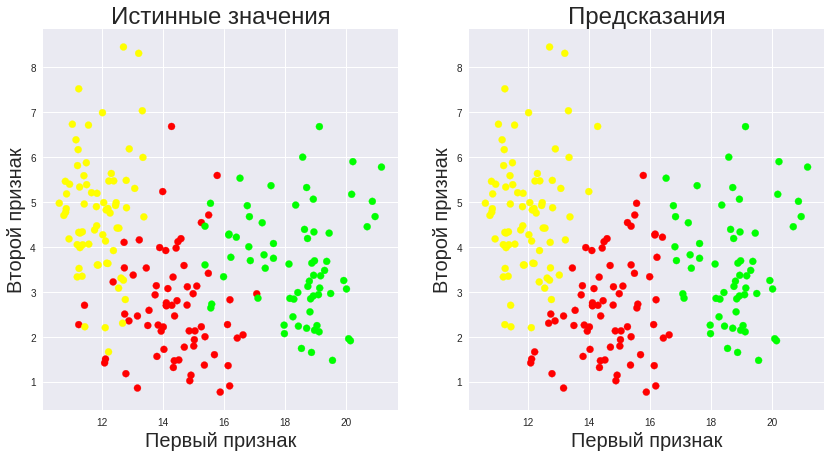

In [147]:
#Строим график предсказаний и график истинных значений.
plt.style.use('seaborn')
plt.figure(figsize=(14, 7))
 
colormap = np.array(['red', 'lime', 'yellow'])
colormap1 = np.array(['lime', 'yellow', 'red'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[true_labels])
plt.title('Истинные значения', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)

 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap1[kmeans.labels_])
plt.title('Предсказания', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)

## Агломеративная иерархическая кластеризация

In [45]:
hierarchy = linkage(seeds_pca, method="complete")

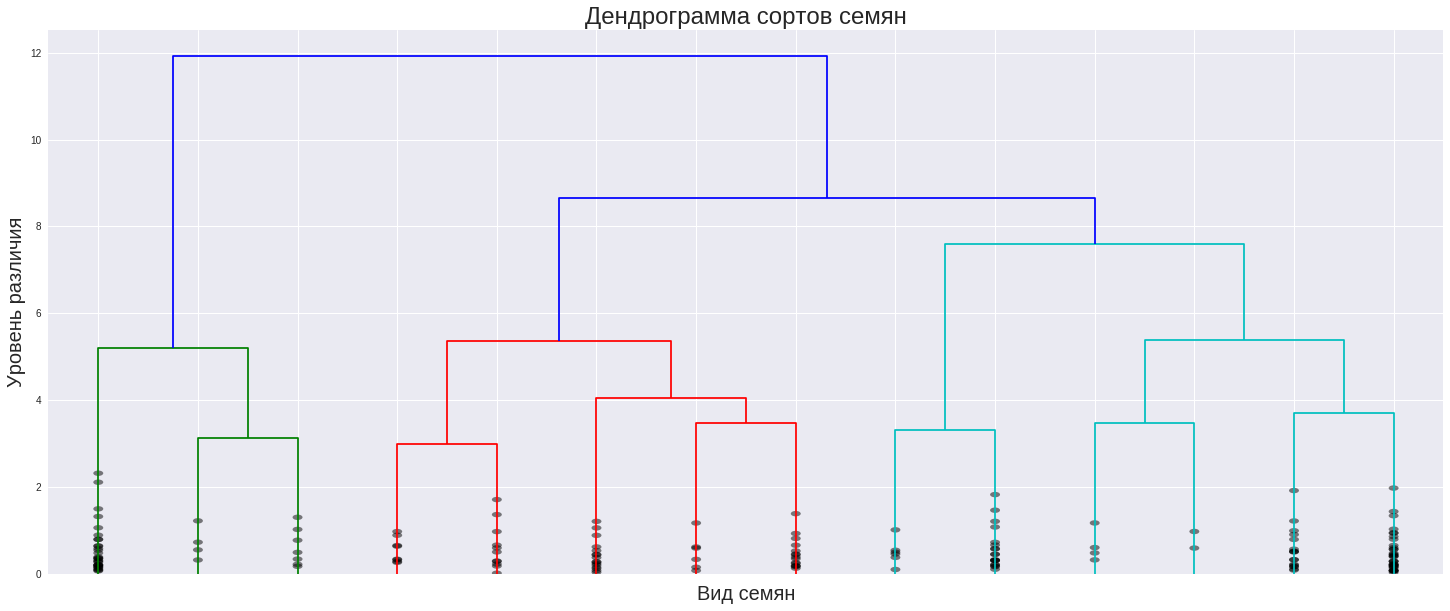

In [46]:
#Строим дендрограмму
fig = plt.figure(figsize=(25, 10))

plt.title("Дендрограмма сортов семян", fontsize=24)
plt.xlabel("Вид семян", fontsize=20)
plt.ylabel("Уровень различия", fontsize=20)
dendrogram = dendrogram(hierarchy,
    truncate_mode="lastp", 
    p=14,  
    show_leaf_counts=False, 
    show_contracted=True)

In [48]:
#Обрежем дерево
cut_tree = cluster.hierarchy.cut_tree(hierarchy, n_clusters=[3])

In [64]:
tree_target = np.array(cut_tree)
tree_target = pd.Series( (v[0] for v in tree_target) )

Text(0, 0.5, 'Второй признак')

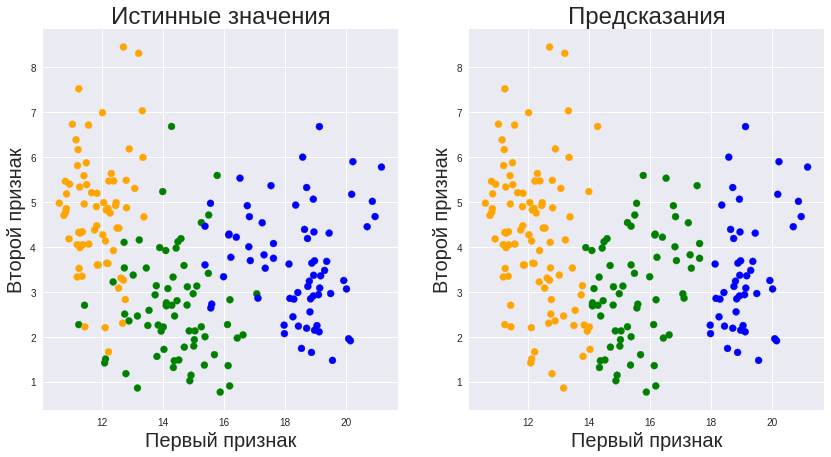

In [145]:
plt.figure(figsize=(14, 7))
 
colormap = np.array(['green', 'blue', 'orange'])
colormap2 = np.array(['green', 'orange', 'blue'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[true_labels])
plt.title('Истинные значения', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap2[tree_target])
plt.title('Предсказания', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)

## DBSCAN

In [125]:
dbscan = DBSCAN(eps=0.6, min_samples=6, algorithm='kd_tree').fit(seeds_pca)

In [126]:
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,
        0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  0,
        0,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  0,
       -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0])

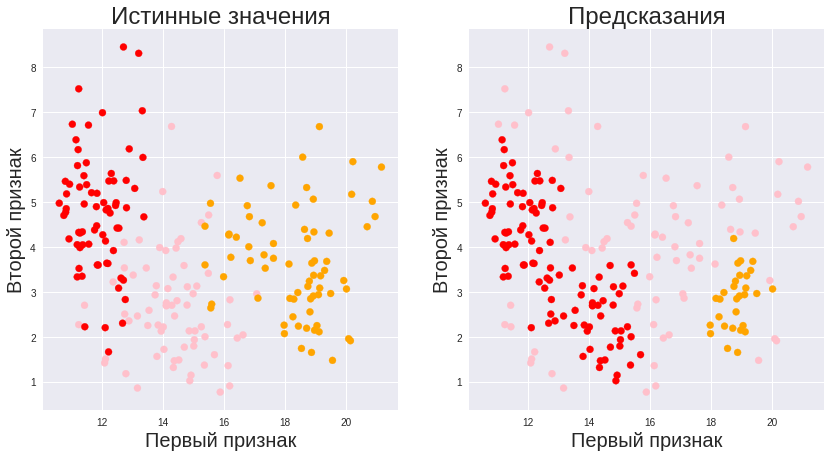

In [146]:
colormap = np.array(['pink', 'orange', 'red'])
colormap3 = np.array(['red', 'orange', 'pink'])

fig = plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[true_labels])
plt.title('Истинные значения', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)

plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap3[dbscan.labels_])
plt.title('Предсказания', fontsize=24)
plt.xlabel("Первый признак", fontsize=20)
plt.ylabel("Второй признак", fontsize=20)
plt.show()